In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("/content/predictive_maintenance.csv")
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [ ]:
df.isnull().sum()

,0
UDI,0
Product ID,0
Type,0
Air temperature [K],0
Process temperature [K],0
Rotational speed [rpm],0
Torque [Nm],0
Tool wear [min],0
Target,0
Failure Type,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [ ]:
df['Product ID'] = df['Product ID'].astype('category')
df['Type'] = df['Type'].astype('category')
df['Failure Type'] = df['Failure Type'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   UDI                      10000 non-null  int64   
 1   Product ID               10000 non-null  category
 2   Type                     10000 non-null  category
 3   Air temperature [K]      10000 non-null  float64 
 4   Process temperature [K]  10000 non-null  float64 
 5   Rotational speed [rpm]   10000 non-null  int64   
 6   Torque [Nm]              10000 non-null  float64 
 7   Tool wear [min]          10000 non-null  int64   
 8   Target                   10000 non-null  int64   
 9   Failure Type             10000 non-null  category
dtypes: category(3), float64(3), int64(4)
memory usage: 922.6 KB


In [ ]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [ ]:
df['Target'].unique()

array([0, 1])

In [ ]:
df['Failure Type'].unique()

['No Failure', 'Power Failure', 'Tool Wear Failure', 'Overstrain Failure', 'Random Failures', 'Heat Dissipation Failure']
Categories (6, object): ['Heat Dissipation Failure', 'No Failure', 'Overstrain Failure', 'Power Failure',
                         'Random Failures', 'Tool Wear Failure']

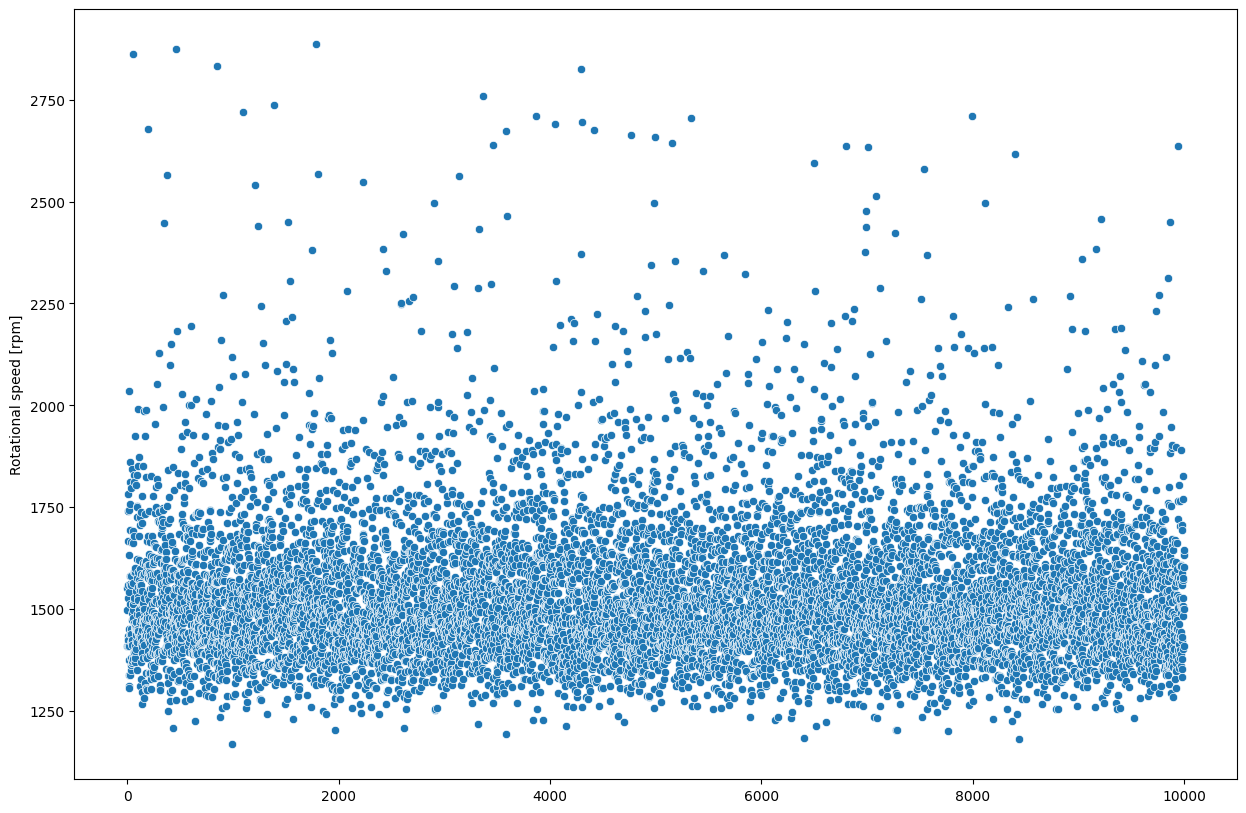

In [ ]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=df['Rotational speed [rpm]'])
plt.show()

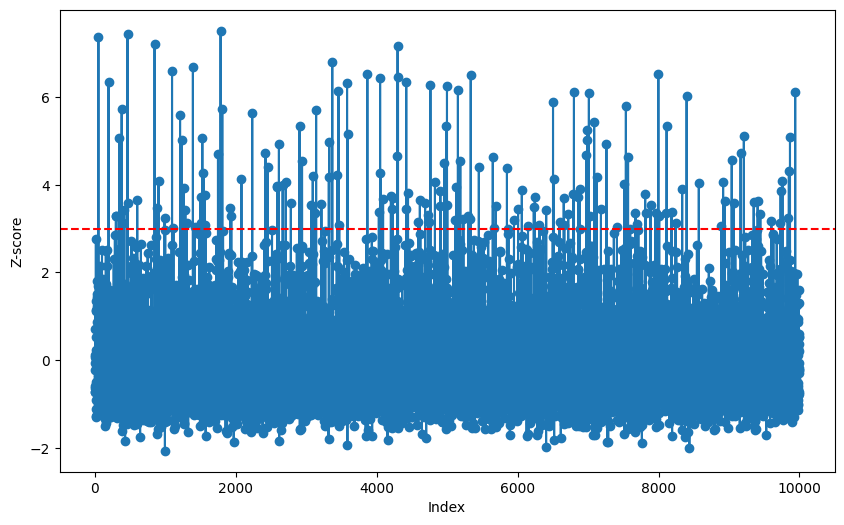

In [ ]:
df['z_score'] = (df['Rotational speed [rpm]'] - df['Rotational speed [rpm]'].mean()) / df['Rotational speed [rpm]'].std()

plt.figure(figsize=(10, 6))
plt.plot(df['z_score'],marker='o')
plt.axhline(y=3, color='r', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Z-score')
plt.show()

In [ ]:
from scipy.stats import skew

skewness = skew(df['Rotational speed [rpm]'])
print(f'Skewness: {skewness}')

Skewness: 1.9928720166048546


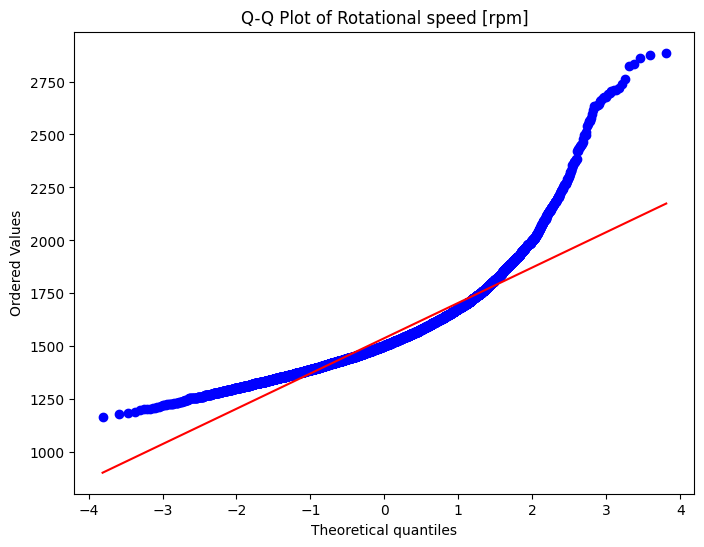

In [ ]:
import scipy.stats as stats

plt.figure(figsize=(8, 6))
stats.probplot(df['Rotational speed [rpm]'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Rotational speed [rpm]')
plt.show()

In [ ]:
print('Highest allowed',df['Rotational speed [rpm]'].mean() + 3*df['Rotational speed [rpm]'].std())
print('Lowest allowed',df['Rotational speed [rpm]'].mean() - 3*df['Rotational speed [rpm]'].std())

Highest allowed 2076.62838774028
Lowest allowed 1000.9238122597203


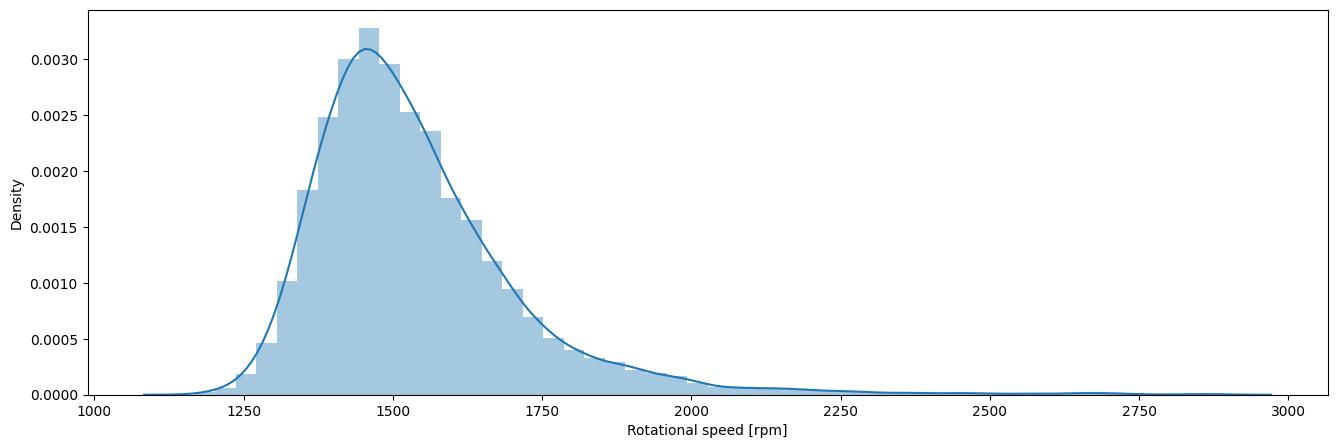

In [ ]:
plt.figure(figsize=(16,5))
sns.distplot(df['Rotational speed [rpm]'])
plt.show()

In [ ]:
q1 = df['Rotational speed [rpm]'].quantile(0.25)
q3 = df['Rotational speed [rpm]'].quantile(0.75)

iqr = q3 - q1

upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr


df = df[(df['Rotational speed [rpm]'] >= lower_limit) & (df['Rotational speed [rpm]'] <= upper_limit)]

In [ ]:
df.drop(columns='z_score',inplace=True)
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [ ]:
corr = df.corr(numeric_only=True)
corr

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
UDI,1.000000,0.114952,0.322722,0.001196,-0.000469,-0.012291,-0.017987
Air temperature [K],0.114952,1.000000,0.875657,0.011249,-0.004665,0.016536,0.088197
Process temperature [K],0.322722,0.875657,1.000000,0.014816,-0.009516,0.015994,0.038407
Rotational speed [rpm],0.001196,0.011249,0.014816,1.000000,-0.890897,0.006252,-0.196548
Torque [Nm],-0.000469,-0.004665,-0.009516,-0.890897,1.000000,-0.005996,0.272304
Tool wear [min],-0.012291,0.016536,0.015994,0.006252,-0.005996,1.000000,0.112843
Target,-0.017987,0.088197,0.038407,-0.196548,0.272304,0.112843,1.000000


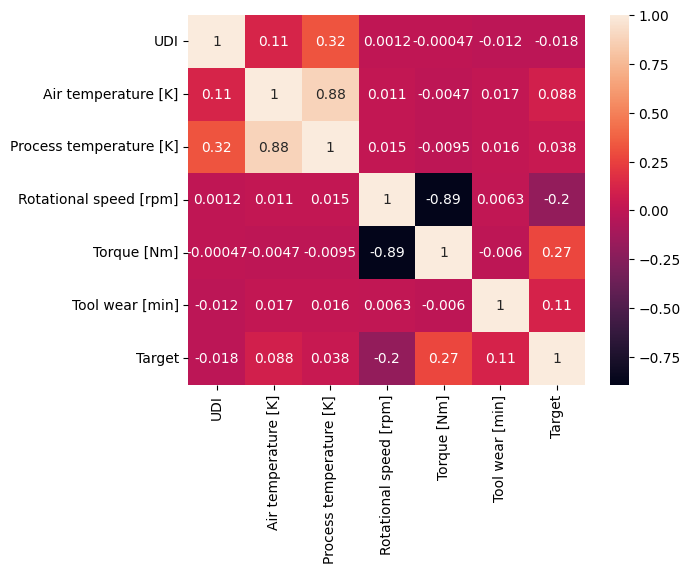

In [ ]:
sns.heatmap(corr, annot=True)
plt.show()

In [ ]:
df['Temperature Difference'] = df['Process temperature [K]'] - df['Air temperature [K]']

df['Normalized Rotational Speed'] = df['Rotational speed [rpm]'] / df['Rotational speed [rpm]'].max()

df['High Torque Indicator'] = df['Torque [Nm]'].apply(lambda x: 1 if x > 45 else 0)

df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Temperature Difference,Normalized Rotational Speed,High Torque Indicator
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure,10.5,0.818470,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure,10.5,0.743008,1
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure,10.4,0.790501,1
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure,10.4,0.756201,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure,10.5,0.743008,0


In [ ]:
df.drop(columns=['UDI','Product ID','Target'],inplace=True)
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type,Temperature Difference,Normalized Rotational Speed,High Torque Indicator
0,M,298.1,308.6,1551,42.8,0,No Failure,10.5,0.818470,0
1,L,298.2,308.7,1408,46.3,3,No Failure,10.5,0.743008,1
2,L,298.1,308.5,1498,49.4,5,No Failure,10.4,0.790501,1
3,L,298.2,308.6,1433,39.5,7,No Failure,10.4,0.756201,0
4,L,298.2,308.7,1408,40.0,9,No Failure,10.5,0.743008,0


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='Failure Type')
y = df['Failure Type']

X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=df['Failure Type'] ,test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7665, 9), (1917, 9), (7665,), (1917,))

In [ ]:
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Define the numerical and categorical columns
num_cols = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
            'Tool wear [min]', 'Temperature Difference', 'Normalized Rotational Speed', 'High Torque Indicator']
cat_cols = ['Type']

# Pipeline for categorical features
cat_transformer = Pipeline(steps=[
    ('label', OrdinalEncoder())
])
num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Combine pipelines into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ])

# Apply transformations
X_train_proccessed = preprocessor.fit_transform(X_train)
X_test_proccessed = preprocessor.transform(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
}

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

model_names = []
accuracies = []

for name, clf in models.items():
    clf.fit(X_train_proccessed, y_train)
    score = clf.score(X_test_proccessed, y_test)  # Use X_test_processed and y_test for scoring
    model_names.append(name)
    accuracies.append(score)
    print(f"{name} accuracy: {score:.2f}")

Decision Tree accuracy: 0.98
Random Forest accuracy: 0.98
K-Nearest Neighbors accuracy: 0.97
Logistic Regression accuracy: 0.98
Support Vector Machine accuracy: 0.97


In [ ]:
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    y_pred = model.predict(X_test_proccessed)  # Use X_test_processed for predictions
    print("Classification Report:")
    print(classification_report(y_test, y_pred))  # Compare predictions with y_test
    plt.show()

Evaluating Decision Tree...
Classification Report:
                          precision    recall  f1-score   support

Heat Dissipation Failure       1.00      0.95      0.98        22
              No Failure       0.99      0.99      0.99      1854
      Overstrain Failure       0.73      0.69      0.71        16
           Power Failure       0.90      0.69      0.78        13
         Random Failures       0.00      0.00      0.00         4
       Tool Wear Failure       0.00      0.00      0.00         8

                accuracy                           0.98      1917
               macro avg       0.60      0.55      0.58      1917
            weighted avg       0.98      0.98      0.98      1917

Evaluating Random Forest...
Classification Report:
                          precision    recall  f1-score   support

Heat Dissipation Failure       1.00      0.95      0.98        22
              No Failure       0.99      1.00      0.99      1854
      Overstrain Failure       0.86 

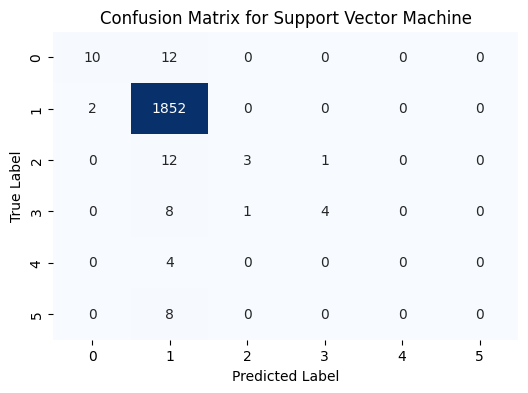

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f'Confusion Matrix for {model_name}')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
label_mapping = {0: 'Not Failure', 1: 'Failure'}  # Adjust if your target labels are different
y_pred_labels = [label_mapping[label] for label in y_pred]

    # Print predictions with human-readable labels
print(f"Predictions by {model_name}:")
print(y_pred_labels[:20])

KeyError: 'No Failure'

In [ ]:
# predictive_maintenance_model.py
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load data
data = pd.read_csv('/content/predictive_maintenance.csv')  # Example CSV file with sensor data
X = data.drop('failure', axis=1)  # Features
y = data['failure']  # Target variable

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Save model
import joblib
joblib.dump(model, 'predictive_model.pkl')



              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11

    accuracy                           1.00        26
   macro avg       1.00      1.00      1.00        26
weighted avg       1.00      1.00      1.00        26



['predictive_model.pkl']

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import joblib

# Load data
data = pd.read_csv('/content/predictive.csv')  # Example CSV file with sensor data
X = data.drop('failure', axis=1)  # Features
y = data['failure']  # Target variable

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Mapping predictions to human-readable labels
label_mapping = {0: 'Not Failure', 1: 'Failure'}  # Adjust based on actual encoding
y_pred_labels = [label_mapping[label] for label in y_pred]

# Print first 20 predictions with labels for better understanding
print("\nFirst 20 predictions with labels:")
for i in range(20):
    print(f"Prediction: {y_pred_labels[i]}, Actual: {label_mapping[y_test.iloc[i]]}")

# Save model
joblib.dump(model, 'predictive_model.pkl')

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11

    accuracy                           1.00        26
   macro avg       1.00      1.00      1.00        26
weighted avg       1.00      1.00      1.00        26


First 20 predictions with labels:
Prediction: Failure, Actual: Failure
Prediction: Not Failure, Actual: Not Failure
Prediction: Not Failure, Actual: Not Failure
Prediction: Not Failure, Actual: Not Failure
Prediction: Not Failure, Actual: Not Failure
Prediction: Not Failure, Actual: Not Failure
Prediction: Not Failure, Actual: Not Failure
Prediction: Not Failure, Actual: Not Failure
Prediction: Not Failure, Actual: Not Failure
Prediction: Failure, Actual: Failure
Prediction: Not Failure, Actual: Not Failure
Prediction: Failure, Actual: Failure
Prediction: Failure, Actual: Failure
Prediction: Failure, Actual: Failure
Prediction: Failure, Actu

['predictive_model.pkl']

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import joblib
import numpy as np

# Load data
data = pd.read_csv('/content/predictive.csv')  # Example CSV file with sensor data
X = data.drop('failure', axis=1)  # Features
y = data['failure']  # Target variable

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Evaluate model
y_pred = model.predict(X_test_scaled)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Save model and scaler
joblib.dump(model, 'predictive_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

# Function to take user input and make predictions
def predict_machine_failure():
    print("Please enter the following sensor data:")

    # Collecting user inputs
    air_temp = float(input("Air temperature [K]: "))
    process_temp = float(input("Process temperature [K]: "))
    rotational_speed = float(input("Rotational speed [rpm]: "))
    torque = float(input("Torque [Nm]: "))
    tool_wear = float(input("Tool wear [min]: "))

    # Feature Engineering (Temperature Difference, Normalized Rotational Speed, High Torque Indicator)
    temp_diff = process_temp - air_temp
    normalized_rot_speed = rotational_speed / X['Rotational speed [rpm]'].max()
    high_torque_indicator = int(torque > 50)  # Example threshold

    # Combine features into a single array
    user_input = np.array([[air_temp, process_temp, rotational_speed, torque, tool_wear]])

    # Load model and scaler
    model = joblib.load('predictive_model.pkl')
    scaler = joblib.load('scaler.pkl')

    # Scale the user input
    user_input_scaled = scaler.transform(user_input)

    # Make prediction
    prediction = model.predict(user_input_scaled)

    # Map prediction to human-readable label
    label_mapping


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11

    accuracy                           1.00        26
   macro avg       1.00      1.00      1.00        26
weighted avg       1.00      1.00      1.00        26



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import joblib
import numpy as np

# Load data
data = pd.read_csv('/content/predictive.csv')  # Example CSV file with sensor data
X = data.drop('failure', axis=1)  # Features
y = data['failure']  # Target variable

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Evaluate model
y_pred = model.predict(X_test_scaled)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Save model and scaler
joblib.dump(model, 'predictive_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

# Function to make predictions with predefined input values
def predict_machine_failure():
    # Hardcoded input values
    air_temp = 70.0  # Example: Air temperature in Kelvin, assumed to be within normal range
    process_temp = 30.0  # Example: Process temperature in Kelvin, assumed to be within normal range
    rotational_speed = 1200.0  # Example: Rotational speed in rpm, assumed to be within normal range
    torque = 30.0  # Example: Torque in Nm, assumed to be below threshold for high torque
    tool_wear = 50.0

    # Feature Engineering (Temperature Difference, Normalized Rotational Speed, High Torque Indicator)
    temp_diff = process_temp - air_temp
    normalized_rot_speed = rotational_speed / X['rpm'].max()
    high_torque_indicator = int(torque > 50)  # Example threshold

    # Combine features into a single array
    user_input = np.array([[air_temp, process_temp, rotational_speed, torque, tool_wear]])

    # Load model and scaler
    model = joblib.load('predictive_model.pkl')
    scaler = joblib.load('scaler.pkl')

    # Scale the input data
    user_input_scaled = scaler.transform(user_input)

    # Make prediction
    prediction = model.predict(user_input_scaled)

    # Map prediction to human-readable label
    label_mapping = {0: 'Not Failure', 1: 'Failure'}  # Adjust if necessary
    prediction_label = label_mapping[prediction[0]]

    print(f"\nPrediction: The machine is likely to experience: {prediction_label}")

# Call the function to make predictions based on hardcoded values
predict_machine_failure()


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11

    accuracy                           1.00        26
   macro avg       1.00      1.00      1.00        26
weighted avg       1.00      1.00      1.00        26


Prediction: The machine is likely to experience: Not Failure


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import joblib
import numpy as np

# Load data
data = pd.read_csv('/content/predictive.csv')  # Replace with the path to your CSV file
X = data.drop('failure', axis=1)  # Features
y = data['failure']  # Target variable

# Ensure 'rpm' column exists if needed for normalization
if 'rpm' in X.columns:
    max_rpm = X['rpm'].max()
else:
    max_rpm = 1  # Default value if 'rpm' is not in columns

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Evaluate model
y_pred = model.predict(X_test_scaled)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Save model and scaler
joblib.dump(model, 'predictive_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

print("Model and scaler saved successfully.")


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11

    accuracy                           1.00        26
   macro avg       1.00      1.00      1.00        26
weighted avg       1.00      1.00      1.00        26

Model and scaler saved successfully.
